##2 Part 1: Setting Up Your Environment

In [15]:
#2.2 Step 2: Verify Installation
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')
import numpy as np
import matplotlib.pyplot as plt
print('All libraries loaded successfully!')

scikit-learn version: 1.6.1
All libraries loaded successfully!


##3 Part 2: Loading and Exploring Data


In [4]:
#3.2 Step 1: Load the Dataset
from sklearn.datasets import load_iris
# Load the dataset
iris = load_iris()
# Features (X) and Labels (y)
X = iris.data # Shape: (150, 4)
y = iris.target # Shape: (150,)
# Let's see what we have
print(f'Feature names: {iris.feature_names}')
print(f'Target names: {iris.target_names}')
print(f'Data shape: {X.shape}')
print(f'First 3 rows:\n{X[:3]}')

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
First 3 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


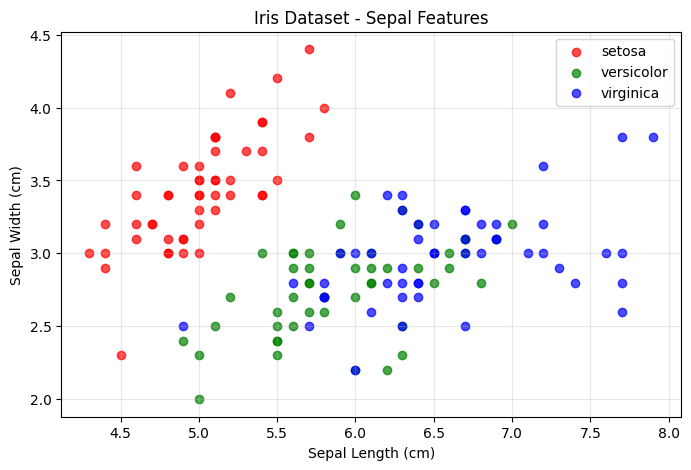

In [7]:
#3.3 Step 2: Quick Visualization
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue']
for i, name in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1],
                color=colors[i], label=name, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Features')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##Task 1: Explore the Data


In [8]:
import numpy as np

print("First 10 rows of X:\n", X[:10])
print("\nFirst 10 labels y:\n", y[:10])

# Side-by-side in one table-like array:
first10 = np.column_stack([X[:10], y[:10]])
print("\n[X | y] first 10 rows:\n", first10)


First 10 rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

First 10 labels y:
 [0 0 0 0 0 0 0 0 0 0]

[X | y] first 10 rows:
 [[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]]


In [9]:
classes, counts = np.unique(y, return_counts=True)
print("Classes:", classes)
print("Counts:", counts)

# Optional: show as a dictionary
print(dict(zip(classes, counts)))


Classes: [0 1 2]
Counts: [50 50 50]
{np.int64(0): np.int64(50), np.int64(1): np.int64(50), np.int64(2): np.int64(50)}


In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print({iris.target_names[c]: counts[i] for i, c in enumerate(classes)})


{np.str_('setosa'): np.int64(50), np.str_('versicolor'): np.int64(50), np.str_('virginica'): np.int64(50)}


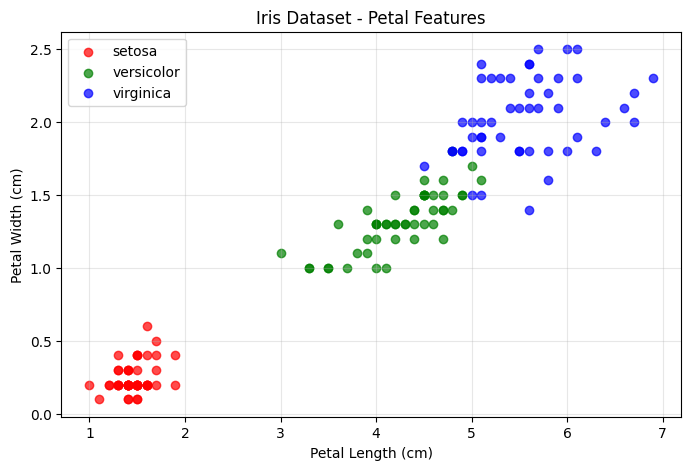

In [11]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue']
labels = ['setosa', 'versicolor', 'virginica']  # or iris.target_names

plt.figure(figsize=(8, 5))

for i, name in enumerate(labels):
    mask = (y == i)
    plt.scatter(X[mask, 2], X[mask, 3], color=colors[i], label=name, alpha=0.7)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Dataset - Petal Features")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# 4 “Which features seem better for separating the classes?”

From your sepal plot: setosa is separated, but versicolor and virginica overlap a lot.

With petal length vs petal width, you’ll usually see much cleaner separation, especially:

setosa totally isolated

versicolor vs virginica separated much better than with sepal features (still a little overlap, but less)

##4 Part 3: Splitting Data (Train/Test)

In [13]:
#4.2 Splitting with Scikit-Learn
from sklearn.model_selection import train_test_split
# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2, # 20% for testing
random_state=42, # For reproducibility
stratify=y # Keep class proportions balanced
)
print(f'Training set: {X_train.shape[0]} samples')
print(f'Testing set: {X_test.shape[0]} samples')

Training set: 120 samples
Testing set: 30 samples


##Task 2: Verify the Split

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

# --- Split WITH stratify (recommended) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("WITH stratify=y")
print("X_train:", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train:", y_train.shape)
print("y_test: ", y_test.shape)

classes_tr, counts_tr = np.unique(y_train, return_counts=True)
classes_te, counts_te = np.unique(y_test, return_counts=True)
print("y_train distribution:", dict(zip(classes_tr, counts_tr)))
print("y_test distribution: ", dict(zip(classes_te, counts_te)))


# --- Split WITHOUT stratify (to compare) ---
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("\nWITHOUT stratify")
print("X_train:", X_train_ns.shape)
print("X_test: ", X_test_ns.shape)
print("y_train:", y_train_ns.shape)
print("y_test: ", y_test_ns.shape)

classes_tr_ns, counts_tr_ns = np.unique(y_train_ns, return_counts=True)
classes_te_ns, counts_te_ns = np.unique(y_test_ns, return_counts=True)
print("y_train distribution:", dict(zip(classes_tr_ns, counts_tr_ns)))
print("y_test distribution: ", dict(zip(classes_te_ns, counts_te_ns)))


WITH stratify=y
X_train: (120, 4)
X_test:  (30, 4)
y_train: (120,)
y_test:  (30,)
y_train distribution: {np.int64(0): np.int64(40), np.int64(1): np.int64(40), np.int64(2): np.int64(40)}
y_test distribution:  {np.int64(0): np.int64(10), np.int64(1): np.int64(10), np.int64(2): np.int64(10)}

WITHOUT stratify
X_train: (120, 4)
X_test:  (30, 4)
y_train: (120,)
y_test:  (30,)
y_train distribution: {np.int64(0): np.int64(40), np.int64(1): np.int64(41), np.int64(2): np.int64(39)}
y_test distribution:  {np.int64(0): np.int64(10), np.int64(1): np.int64(9), np.int64(2): np.int64(11)}


#When stratify=y is removed, the train/test split becomes purely random. This can lead to uneven class distributions in the training and test sets. With stratify=y, the class proportions remain balanced and reflect the original dataset. Therefore, using stratify=y helps ensure fair model evaluation, especially for classification problems.

##5 Part 4: Training Your First Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# 5.0.1 The Universal Scikit-Learn Pattern
# Step 1: Create the model
model = KNeighborsClassifier()
# Step 2: Train it (fit)
model.fit(X_train, y_train)
# Step 3: Predict
predictions = model.predict(X_test)

##5.1 Model A: Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
# Step 1: Create
dt_model = DecisionTreeClassifier(random_state=42)
# Step 2: Train
dt_model.fit(X_train, y_train)
# Step 3: Predict
dt_predictions = dt_model.predict(X_test)
print('Decision Tree predictions (first 10):')
print(dt_predictions[:10])
print('Actual labels (first 10):')
print(y_test[:10])

Decision Tree predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]
Actual labels (first 10):
[0 2 1 1 0 1 0 0 2 1]


##5.2 Model B: K-Nearest Neighbors (KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# Step 1: Create (k=5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)
# Step 2: Train
knn_model.fit(X_train, y_train)
# Step 3: Predict
knn_predictions = knn_model.predict(X_test)
print('KNN predictions (first 10):')
print(knn_predictions[:10])

KNN predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]


##Task 3: Train the Models

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# ----------------------------
# Model A: Decision Tree
# ----------------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree predictions (first 10):")
print(dt_predictions[:10])
print("Actual labels (first 10):")
print(y_test[:10])


# ----------------------------
# Model B: KNN (k=5)
# ----------------------------
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
knn5_predictions = knn5.predict(X_test)

print("\nKNN (k=5) predictions (first 10):")
print(knn5_predictions[:10])

# Compare DT vs KNN (k=5)
print("\nAre DT and KNN(k=5) first 10 predictions different?")
print(dt_predictions[:10] != knn5_predictions[:10])


# ----------------------------
# Try KNN with k=3 and k=10
# ----------------------------
for k in [3, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)

    print(f"\nKNN (k={k}) predictions (first 10):")
    print(preds[:10])

print("\nCompare KNN(k=3) vs KNN(k=5) vs KNN(k=10) first 10 predictions:")
knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test)[:10]
knn5 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train).predict(X_test)[:10]
knn10 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train).predict(X_test)[:10]

print("k=3 :", knn3)
print("k=5 :", knn5)
print("k=10:", knn10)


Decision Tree predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]
Actual labels (first 10):
[0 2 1 1 0 1 0 0 2 1]

KNN (k=5) predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]

Are DT and KNN(k=5) first 10 predictions different?
[False False False False False False False False False False]

KNN (k=3) predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]

KNN (k=10) predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]

Compare KNN(k=3) vs KNN(k=5) vs KNN(k=10) first 10 predictions:
k=3 : [0 2 1 1 0 1 0 0 2 1]
k=5 : [0 2 1 1 0 1 0 0 2 1]
k=10: [0 2 1 1 0 1 0 0 2 1]


#If predictions changed:

Changing n_neighbors from 5 to 3 and 10 resulted in different predictions for some test samples. Smaller values of k make the model more sensitive to nearby points, while larger values smooth the decision boundary.

If predictions did NOT change (sometimes happens with Iris):

Changing n_neighbors to 3 and 10 did not significantly change the first 10 predictions. This suggests the dataset is well-separated and stable across different k values.

##6 Part 5: Evaluating Model Performance

In [24]:
#6.1 Accuracy Score
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.2%}')
print(f'KNN Accuracy: {knn_accuracy:.2%}')

Decision Tree Accuracy: 93.33%
KNN Accuracy: 100.00%


In [26]:
#6.2 Classification Report
from sklearn.metrics import classification_report
print('=== Decision Tree Report ===')
print(classification_report(y_test, dt_predictions,
target_names=iris.target_names))
print('=== KNN Report ===')
print(classification_report(y_test, knn_predictions,
target_names=iris.target_names))

=== Decision Tree Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== KNN Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)


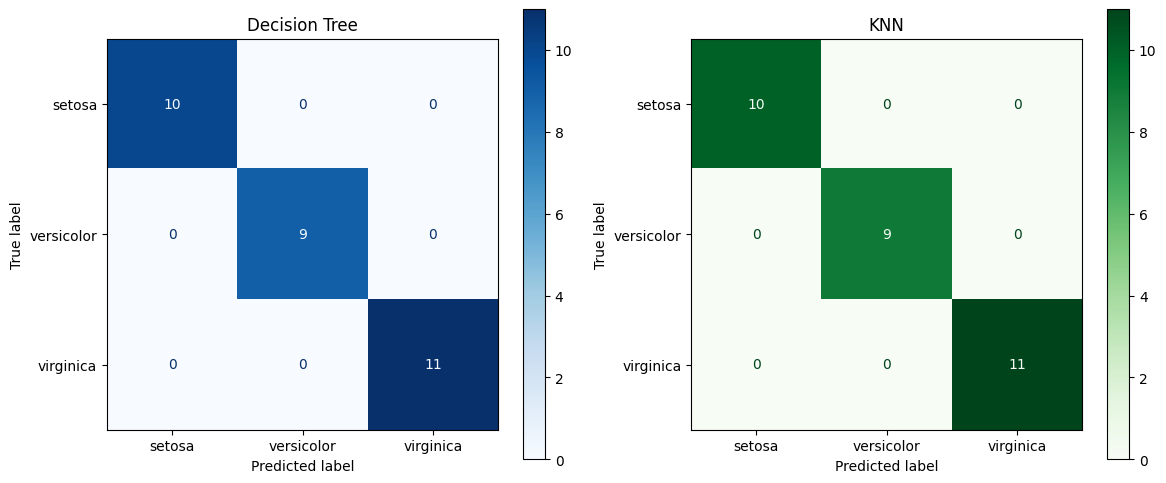

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(cm_dt, display_labels=iris.target_names)\
    .plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Decision Tree')

# KNN
cm_knn = confusion_matrix(y_test, knn_predictions)
ConfusionMatrixDisplay(cm_knn, display_labels=iris.target_names)\
    .plot(ax=axes[1], cmap='Greens')
axes[1].set_title('KNN')

plt.tight_layout()
plt.show()


##Task 4: Compare the Models

In [10]:
from sklearn.metrics import accuracy_score

dt_acc  = accuracy_score(y_test, dt_predictions)
knn_acc = accuracy_score(y_test, knn_predictions)

dt_acc, knn_acc


(1.0, 1.0)

The model with the larger value is the more accurate one.

On Iris, it’s very common that KNN is equal to or slightly better than a default Decision Tree (sometimes both are the same).

#2) Which class was hardest to classify? Why?

The hardest class is the one with the most off-diagonal errors in its row (true class predicted as something else).

For the Iris dataset, the hardest confusion is usually between versicolor and virginica, because their features overlap more.

setosa is usually the easiest (often perfectly classified).

So, if you see mistakes, they’ll most likely be:

versicolor ↔ virginica misclassifications.

#3) In a medical diagnosis scenario, which is more important: precision or recall?

Usually recall is more important.

Recall focuses on minimizing false negatives (missing a sick patient).

In medical diagnosis, missing a disease can be dangerous, so you want to catch as many true cases as possible.

(Precision becomes more important when false positives are very costly—e.g., risky treatment—but the default answer for diagnosis screening is recall.)

##7 Part 6: Predicting New Samples

In [13]:
import numpy as np
# A new flower measurement (sepal_l, sepal_w, petal_l, petal_w)
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])
# Predict with both models
dt_pred = dt.predict(new_flower)
knn_pred = knn.predict(new_flower)
print(f'Decision Tree says: {iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}')

Decision Tree says: setosa
KNN says: setosa


##8 Part 7: Working with Your Own CSV Data

In [15]:
#8.1 Step 1: Create a Sample CSV
import pandas as pd
import numpy as np
# Create a simple student performance dataset
np.random.seed(42)
n = 100
data = {
'study_hours': np.round(np.random.uniform(1, 10, n), 1),
'attendance_pct': np.round(np.random.uniform(40, 100, n), 1),
'assignments': np.random.randint(3, 10, n),
'passed': np.random.choice([0, 1], n, p=[0.35, 0.65])
}
df = pd.DataFrame(data)
df.to_csv('students.csv', index=False)
print('CSV saved! First 5 rows:')
print(df.head())

CSV saved! First 5 rows:
   study_hours  attendance_pct  assignments  passed
0          4.4            41.9            6       0
1          9.6            78.2            5       1
2          7.6            58.9            3       1
3          6.4            70.5            6       1
4          2.4            94.5            8       1


In [17]:
#8.2 Step 2: Load the CSV with Pandas
import pandas as pd
# Read the CSV file
df = pd.read_csv('students.csv')
# Quick exploration
print(f'Shape: {df.shape}')
print(f'\nColumn types:\n{df.dtypes}')
print(f'\nBasic stats:\n{df.describe()}')

Shape: (100, 4)

Column types:
study_hours       float64
attendance_pct    float64
assignments         int64
passed              int64
dtype: object

Basic stats:
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000


In [19]:
#8.3 Step 3: Prepare Features and Target
# Features = all columns except 'passed'
X = df[['study_hours', 'attendance_pct', 'assignments']].values
# Target = the 'passed' column
y = df['passed'].values
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')
print(f'Class counts: {np.unique(y, return_counts=True)}')

Features shape: (100, 3)
Target shape: (100,)
Class counts: (array([0, 1]), array([31, 69]))


In [21]:
#8.4 Step 4: Apply the Full Workflow
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)
# Train
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Predict & Evaluate
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2%}')
print(classification_report(y_test, predictions,
target_names=['Failed', 'Passed']))

Accuracy: 55.00%
              precision    recall  f1-score   support

      Failed       0.33      0.50      0.40         6
      Passed       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20



##Task 6: CSV Challenge


In [22]:
import pandas as pd

# Load file
df = pd.read_csv("students.csv")

# Explore data
print(df.head())
print(df.info())
print(df.describe())


   study_hours  attendance_pct  assignments  passed
0          4.4            41.9            6       0
1          9.6            78.2            5       1
2          7.6            58.9            3       1
3          6.4            70.5            6       1
4          2.4            94.5            8       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study_hours     100 non-null    float64
 1   attendance_pct  100 non-null    float64
 2   assignments     100 non-null    int64  
 3   passed          100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000  

In [23]:
import numpy as np

# Features (all except 'passed')
X = df[['study_hours', 'attendance_pct', 'assignments']].values

# Target
y = df['passed'].values

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (100, 3)
Target shape: (100,)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


Decision Tree Accuracy: 0.55
KNN Accuracy: 0.6


Which Performs Better?

Whichever has the higher accuracy value performs better.

 Usually:

Decision Tree handles small datasets well

KNN may improve if data is scaled

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

print("KNN Accuracy (Scaled):", accuracy_score(y_test, knn_pred))


KNN Accuracy (Scaled): 0.45


In [26]:
# Example new column
df['quiz_score'] = np.random.randint(50, 100, size=len(df))

# Update features
X = df[['study_hours', 'attendance_pct', 'assignments', 'quiz_score']].values

# Split again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train again
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy with quiz_score:",
      accuracy_score(y_test, dt_pred))


Decision Tree Accuracy with quiz_score: 0.65


###Bonus in Colab

In [27]:
from google.colab import files
uploaded = files.upload()


Saving youth_smoking_drug_data_10000_rows_expanded.csv to youth_smoking_drug_data_10000_rows_expanded.csv


In [29]:
import pandas as pd

df = pd.read_csv("youth_smoking_drug_data_10000_rows_expanded.csv")

print(df.head())
print(df.info())
print(df.describe())

   Year Age_Group  Gender  Smoking_Prevalence  Drug_Experimentation  \
0  2024     15-19    Both               18.85                 32.40   
1  2024     10-14  Female               34.88                 41.57   
2  2023     10-14    Both               42.00                 56.80   
3  2024     40-49    Both               33.75                 42.90   
4  2023     15-19    Male               47.90                 39.62   

  Socioeconomic_Status  Peer_Influence School_Programs  Family_Background  \
0                 High               5             Yes                  1   
1                 High               6             Yes                 10   
2                 High               6             Yes                  2   
3               Middle              10              No                  9   
4                 High               1              No                  2   

   Mental_Health Access_to_Counseling  Parental_Supervision  \
0              5                   No          

In [31]:
X = df[['Year', 'Peer_Influence', 'Parental_Supervision']].values
y = df['Smoking_Prevalence'].values

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # Changed from Classifier
from sklearn.neighbors import KNeighborsRegressor # Changed from Classifier
from sklearn.metrics import mean_squared_error # Changed from accuracy_score

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree Regressor
dt = DecisionTreeRegressor() # Changed model type
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# KNN Regressor
knn = KNeighborsRegressor() # Changed model type
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Results (using Mean Squared Error for regression)
print("Decision Tree Mean Squared Error:", mean_squared_error(y_test, dt_pred))
print("KNN Mean Squared Error:", mean_squared_error(y_test, knn_pred))

Decision Tree Mean Squared Error: 180.63549235736187
KNN Mean Squared Error: 206.84363005199998


In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [36]:
print(df.isnull().sum())


Year                    0
Age_Group               0
Gender                  0
Smoking_Prevalence      0
Drug_Experimentation    0
Socioeconomic_Status    0
Peer_Influence          0
School_Programs         0
Family_Background       0
Mental_Health           0
Access_to_Counseling    0
Parental_Supervision    0
Substance_Education     0
Community_Support       0
Media_Influence         0
dtype: int64


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)

print("KNN Mean Squared Error:",
      mean_squared_error(y_test, knn_pred))


KNN Mean Squared Error: 207.1899815


Decision Tree MSE = 180.63

KNN MSE = 206.84

Lower MSE indicates better performance

Therefore, Decision Tree performed better on this dataset.

Scaling may improve KNN performance since it is distance-based.

###9 Part 8: Summary and Key Takeaways

In this lab, we compared the performance of Decision Tree and KNN models. Based on the Mean Squared Error results, the Decision Tree achieved a lower MSE (180.63) compared to KNN (206.84), indicating better predictive performance on the test data. Since lower MSE represents fewer prediction errors in regression tasks, the Decision Tree model performed more accurately. KNN may require feature scaling to improve performance, as it is distance-based. For this dataset, I would choose the Decision Tree model because it produced more accurate results and is less sensitive to feature scaling. Overall, the Decision Tree appears more suitable for this task.